<a href="https://colab.research.google.com/github/baliant/Thesis/blob/main/NagyBalint_Thesis_0_DataDownload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Description


The scope of this notebook is to implement TimesNet model, execute forecasting task for a weather time series.


Weather stations, source: https://confluence.ecmwf.int/display/CKB/E-OBS+daily+gridded+observations+for+Europe+from+1950+to+present%3A+Product+user+guide
  
)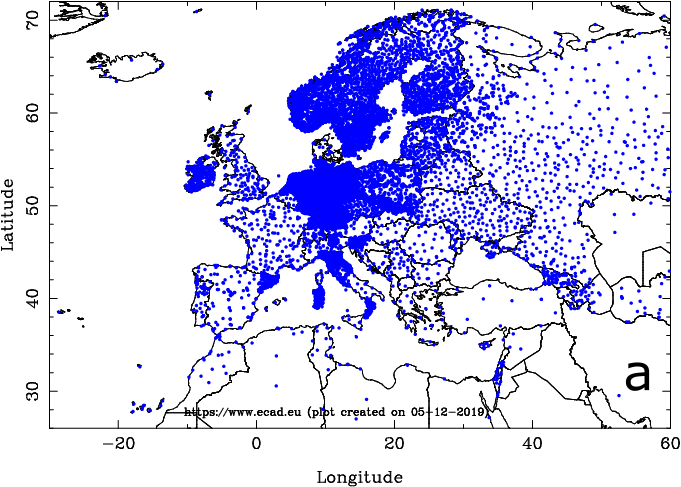

# Data from cdsAPI

1. Register: https://cds.climate.copernicus.eu/how-to-api
2. Download the API key as *.cdsapirc extension
3. Upload to root folder (Google Colab)
4. Call API request

## Installation

In [ ]:
# https://cds.climate.copernicus.eu/how-to-api
# https://stackoverflow.com/questions/78834508/unable-to-download-the-data-of-era5-using-new-beta-cds
!pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=4ecc72c7252fad75b0eb6bbe39cb14dd0c55484c68620c31fd4c6fdd800c8a5a
  Stored in directory: /root/.cache/pip/wheels/be/05/e0/65a6edb0a000498aeaefbadd80228bf5ed1bdbb82840ca1692
Successfully built multiurl


## API calls

Steps taken in order to use the new API (from 26-SEP-2024)
https://forum.ecmwf.int/t/step-by-step-instructions-on-how-to-download-data-using-new-climate-data-store-beta-cds-beta/3743

0,1 deg ~ 11 x 11 km
0,25 deg ~ 28 x 28 km at the equator
https://confluence.ecmwf.int/display/OIFS/1+Gaussian+grids
https://confluence.ecmwf.int/display/S2S/ECMWF+model+description
datafile desc https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php#datafiles
https://surfobs.climate.copernicus.eu/userguidance/daily_vs_full_eobs.php
gridding: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2017JD028200
direct access to nc files: https://surfobs.climate.copernicus.eu/dataaccess/access_eobs_chunks.php

### Climate

In [ ]:
# Download climate dataset from CDS with new API, 2011-2024
import cdsapi

dataset = "insitu-gridded-observations-europe"
request = {
    "product_type": "ensemble_mean",
    "variable": [
        "mean_temperature",
        # "minimum_temperature"
        # "maximum_temperature",
        "sea_level_pressure",
        "precipitation_amount",
        "relative_humidity"
    ],
    # "grid_resolution": "0_1deg",
    "grid_resolution": "0_25deg",
    # "period": "1995_2010",
    "period": "2011_2024",
    "version": ["30_0e"],
    #"area": [45, 15, 40, 22],  # North, West, South, East
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

2024-12-16 17:39:16,840 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-16 17:39:16,844 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.le

1de1ba0b5d643028fdfa6fab81ffb757.zip:   0%|          | 0.00/391M [00:00<?, ?B/s]

'1de1ba0b5d643028fdfa6fab81ffb757.zip'

### Atmosphere

In [ ]:
# Download PM2.5 dataset from CDS with new API, 1995-2010
# https://ads.atmosphere.copernicus.eu/datasets/cams-europe-air-quality-reanalyses?tab=documentation#
import cdsapi

dataset = "cams-europe-air-quality-reanalyses"
request = {
    "variable": ["particulate_matter_2.5um"],
    "model": ["ensemble"],
    "level": ["0"],
    "type": ["validated_reanalysis"],
    "year": ["2021"],
    "month": [
      # "01", "04", "07", "10"
      # "02", "05", "08", "11"
      "03", "06", "09", "12"

    ]
}
client = cdsapi.Client()
client.retrieve(dataset, request).download()

In [ ]:
# Download PM2.5 dataset from CDS with new API, 1995-2010
# https://ads.atmosphere.copernicus.eu/datasets/cams-europe-air-quality-reanalyses?tab=documentation#
import cdsapi

dataset = "cams-europe-air-quality-reanalyses"
request = {
    "variable": ["particulate_matter_2.5um"],
    "model": ["ensemble"],
    "level": ["0"],
    "type": ["validated_reanalysis"],
    "year": ["2021"],
    "month": [
      # "01", "04", "07", "10"
      # "02", "05", "08", "11"
      "03", "06", "09", "12"
    ]
    }
client = cdsapi.Client()
client.retrieve(dataset, request).download()

2024-12-02 11:45:01,042 WARNING [2024-11-27T00:00:00] System is back on service under testing conditions. Please follow updates [here](https://forum.ecmwf.int/t/cds-ads-and-ewds-down-until-further-notice/8015) and status [here](https://status.ecmwf.int/)
2024-12-02 11:45:01,045 INFO [2024-09-26T00:00:00] **Welcome to the New Atmosphere Data Store (ADS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new ADS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] **Welcome to the New Atmosphere Data Store (ADS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/creat

HTTPError: 403 Client Error: Forbidden for url: https://ads.atmosphere.copernicus.eu/api/retrieve/v1/processes/cams-europe-air-quality-reanalyses/execution
cost limits exceeded
Your request is too large, please reduce your selection.

## Extract zip files (get netCDF files)

In [ ]:
import zipfile
import os

In [ ]:
def extract(zip_path):
  """Function for extracting the downloaded zip file"""
  extract_dir =  '/content'
  try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
    print(f"Contents of '{extract_dir}': {os.listdir(extract_dir)}")

  except FileNotFoundError:
    print(f"Error: The file '{zip_path}' does not exist.")
  except zipfile.BadZipFile:
    print(f"Error: The file '{zip_path}' is not a valid ZIP file.")
  except Exception as e:
    print(f"An error occurred: {str(e)}")

In [ ]:
extract('1de1ba0b5d643028fdfa6fab81ffb757.zip')

Contents of '/content': ['.config', 'pp_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc', 'hu_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc', 'tg_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc', 'tg_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc', 'rr_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc', 'rr_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc', 'pp_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc', 'hu_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc', '.ipynb_checkpoints', '1de1ba0b5d643028fdfa6fab81ffb757.zip', 'sample_data']


In [ ]:
extract('Europe_2011_2023.zip')

## Merging raw files

In [ ]:
# Merging netCDF files
import xarray as xr
import os

ds = xr.open_mfdataset('*.nc',combine = 'by_coords')
ds.to_netcdf('MaxTemperature_1995_2024.nc')

directory_path = "/content"

# Iterate over files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory_path, filename)
        print(f"Opening dataset: {filename}")

        # Open the dataset
        dataset = xr.open_dataset(file_path)

        # Print the dataset
        print(dataset)
        print("\n" + "-"*40 + "\n")

## Visualization

### Package Install

In [ ]:
# Handling netCDF multidimensional formats
# Source: https://xarray.dev/
# !pip install xarray
!pip install cartopy
#       https://pypi.org/project/Cartopy/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.8 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import cartopy.feature as cfeature

# Interactive
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

### Visualize for a specific date

In [ ]:
netcdf_file= xr.open_dataset('DailyPrecSum_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')
print(netcdf_file)

<xarray.Dataset> Size: 2GB
Dimensions:    (latitude: 201, longitude: 464, time: 5844)
Coordinates:
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * time       (time) datetime64[ns] 47kB 1995-01-01 1995-01-02 ... 2010-12-31
Data variables:
    rr         (time, latitude, longitude) float32 2GB ...
Attributes:
    E-OBS_version:  30.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Aug 30 12:51:40 2024: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 5.1.8 (Homepage = http://nco.sf....


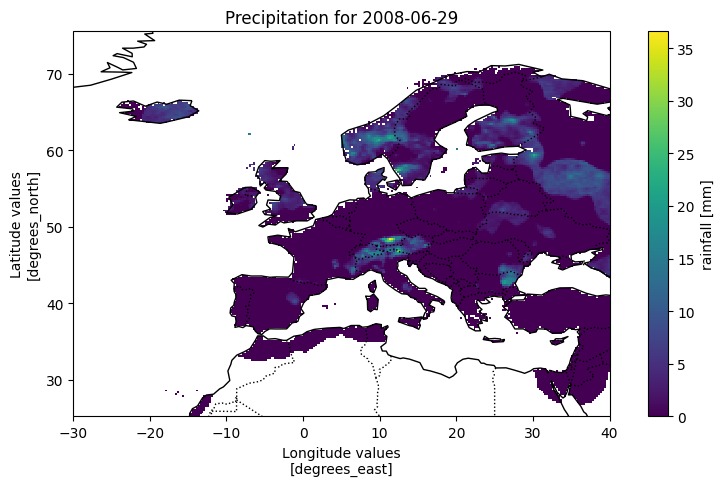

In [ ]:
desired_date = '2008-06-29'
data_for_desired_date = netcdf_file.sel(time=desired_date)
filtered_data = data_for_desired_date.where(
    (data_for_desired_date.longitude >= -30) & (data_for_desired_date.longitude <= 40),
    drop=True
)

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set ticks and labels
ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
ax.set_yticks(range(20, 80, 10), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude [degrees_east]')
ax.set_ylabel('Latitude [degrees_north]')

# Plot the filtered data
filtered_data['rr'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis")

plt.title(f"Precipitation for {desired_date}")
plt.show()

#### Visualize with a function

In [ ]:
def plot_data(dataset, desired_date, variable_name, title, vmin=None, vmax=None):
    """
    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data with time, latitude, and longitude dimensions.
    - desired_date: str
        The date to filter and plot data for (format: 'YYYY-MM-DD').
    - variable_name: str
        The name of the variable to plot (e.g., 'tg').
    - title: str
        The title of the plot.
    """
    # Select the data for the desired date
    data_for_desired_date = dataset.sel(time=desired_date)

    # Filter the dataset to include only data between -30 and 40 degrees longitude
    filtered_data = data_for_desired_date.where(
        (data_for_desired_date.longitude >= -30) & (data_for_desired_date.longitude <= 40),
        drop=True
    )

    # Plot the  data
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Set ticks and labels
    ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(range(20, 80, 10), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude [degrees_east]')
    ax.set_ylabel('Latitude [degrees_north]')

    # Plot the selected variable from the filtered data
    filtered_data[variable_name].plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="plasma",
        vmin=vmin,
        vmax=vmax
    )

    # Set the title
    plt.title(title)
    plt.show()

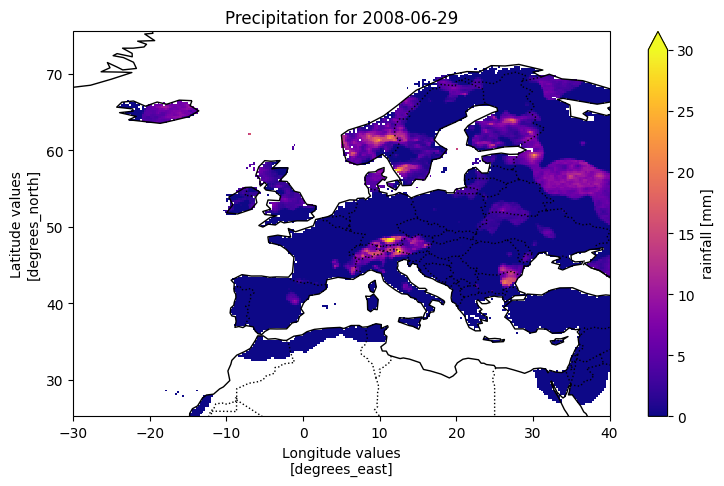

In [ ]:
plot_data(
    dataset=netcdf_file,
    desired_date='2008-06-29',
    variable_name='rr',
    title="Precipitation for 2008-06-29",
    vmin=0,
    vmax=30
)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a Date Picker widget
date_picker = widgets.DatePicker(
    description='Select Date',
    disabled=False
)

# Function to handle date selection - plot each selection in order
def on_date_change(change):
    if change['new']:
        desired_date = change['new'].strftime('%Y-%m-%d')  # Convert to desired format
        variable_name = 'rr'
        title = f"Precipitation for {desired_date}"


        plot_data(netcdf_file, desired_date, variable_name, title)

DatePicker(value=None, description='Select Date')

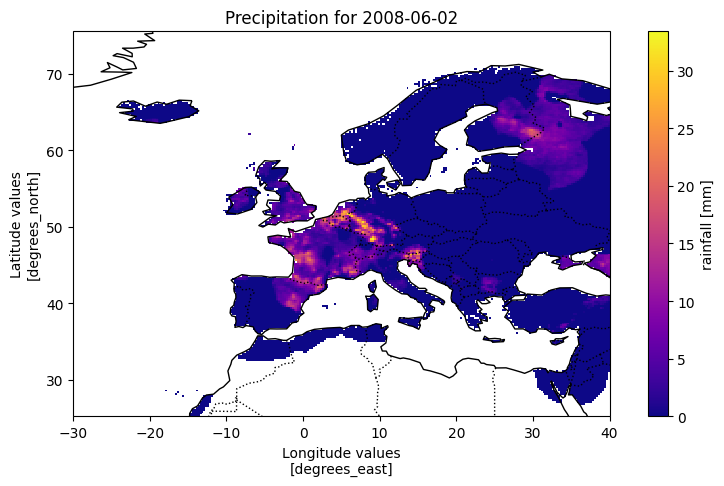

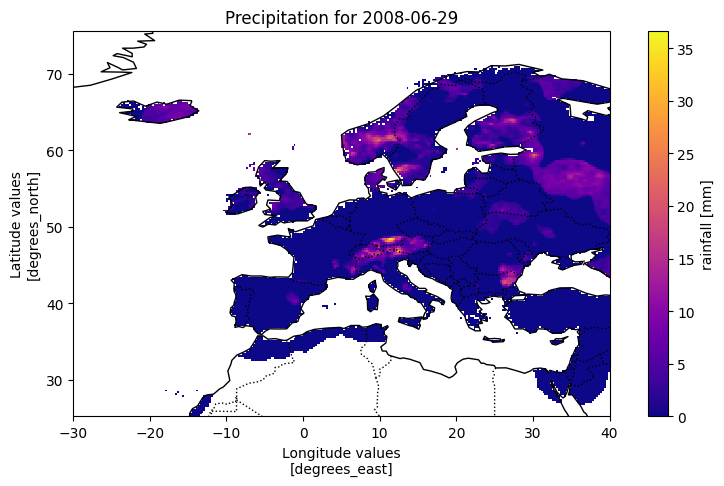

In [ ]:
date_picker.observe(on_date_change, names='value')
display(date_picker)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a Date Picker widget
date_picker = widgets.DatePicker(
    description='Select Date',
    disabled=False
)

# Function to handle date selection - reload
def on_date_change(change):
    if change['new']:
        # Clear the previous output
        clear_output(wait=True)

        display(date_picker)

        desired_date = change['new'].strftime('%Y-%m-%d')
        variable_name = 'rr'
        title = f"Precipitation for {desired_date}"


        print(f"Updating plot for date: {desired_date}")
        plot_data(netcdf_file, desired_date, variable_name, title)

DatePicker(value=datetime.date(2008, 6, 29), description='Select Date')

Updating plot for date: 2008-06-29


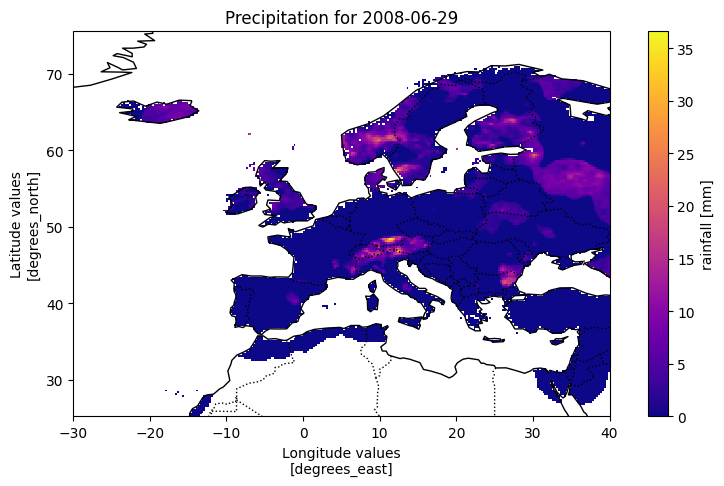

In [ ]:
date_picker.observe(on_date_change, names='value')
display(date_picker)

#### Universal plotting tool

In [ ]:
# Plot data
def plot_data(dataset, desired_date, variable_name, output_path, title, vmin=None, vmax=None):
    """
    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data with time, latitude, and longitude dimensions.
    - desired_date: str
        The date to filter and plot data for (format: 'YYYY-MM-DD').
    - variable_name: str
        The name of the variable to plot (e.g., 'tg').
    - title: str
        The title of the plot.
    """
    # Select the data for the desired date
    data_for_desired_date = dataset.sel(time=desired_date)

    # Filter the dataset to specific coordinates
    filtered_data = data_for_desired_date.where(
        (data_for_desired_date.longitude >= -25) & (data_for_desired_date.longitude <= 40) &
        (data_for_desired_date.latitude >= 35) & (data_for_desired_date.latitude <= 72),

        drop=True
    )

    # Plot the  data
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Set ticks and labels
    ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(range(20, 80, 10), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude [degrees_east]')
    ax.set_ylabel('Latitude [degrees_north]')

    # Plot the selected variable from the filtered data
    filtered_data[variable_name].plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="plasma",
        vmin=vmin,
        vmax=vmax
    )

    # Set the title
    plt.title(title)
    plt.show()

    plt.savefig(output_path)
    plt.close()

In [ ]:
netcdf_file.info()

xarray.Dataset {
dimensions:
	time = 4930 ;
	latitude = 201 ;
	longitude = 464 ;

variables:
	float32 hu(time, latitude, longitude) ;
		hu:units = % ;
		hu:long_name = mean relative humidity ;
		hu:standard_name = relative_humidity ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = Latitude values ;
		latitude:axis = Y ;
		latitude:standard_name = latitude ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = Longitude values ;
		longitude:axis = X ;
		longitude:standard_name = longitude ;
	datetime64[ns] time(time) ;
		time:long_name = Time in days ;
		time:standard_name = time ;

// global attributes:
	:E-OBS_version = 30.0e ;
	:Conventions = CF-1.4 ;
	:References = http://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php ;
	:history = Mon Sep  9 11:16:13 2024: ncks --no-abc -d time,22280,27209 /nobackup_1/users/besselaa/Data/Gridding/EOBSv30.0e/Grid_0.25deg/hu//hu_ensmean_master_rectime.nc /nobackup

### Humidity

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


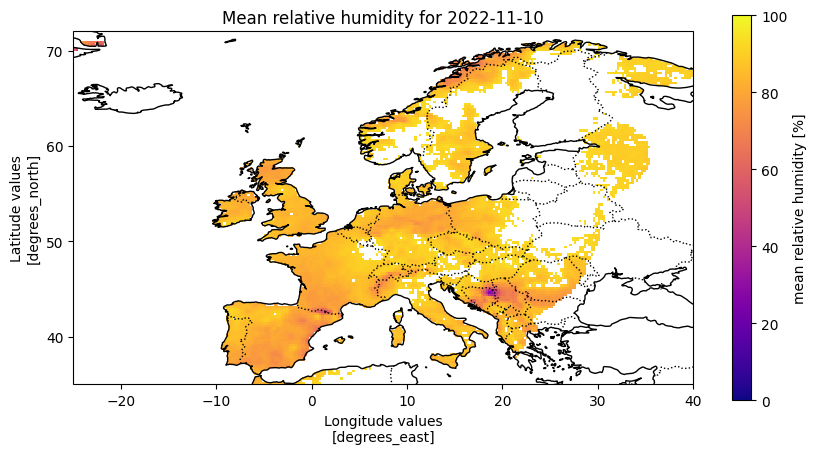

In [ ]:
# 2022-11-10
netcdf_file= xr.open_dataset('hu_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
variable_name = 'hu'
desired_date='2022-11-10'
plot_data(
    dataset=netcdf_file,
    desired_date=desired_date,
    variable_name=variable_name,
    title=(f"{getattr(netcdf_file, variable_name).long_name.capitalize()} for {desired_date}"),
    output_path="./output",
    vmin=0,
    vmax=100
)

### Sea Level Pressure

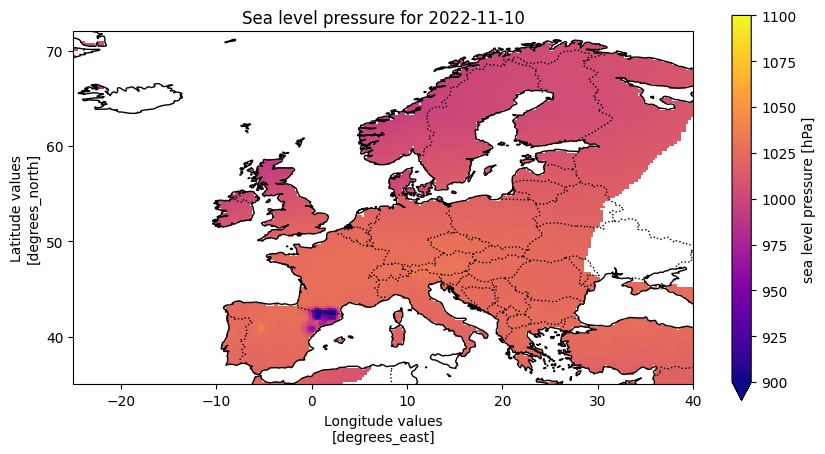

In [ ]:
netcdf_file= xr.open_dataset('pp_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
variable_name = 'pp'
desired_date='2022-11-10'
plot_data(
    dataset=netcdf_file,
    desired_date=desired_date,
    variable_name=variable_name,
    title=(f"{getattr(netcdf_file, variable_name).long_name.capitalize()} for {desired_date}"),
    output_path="./output",
    vmin=900,
    vmax=1100
)

### Precipitation

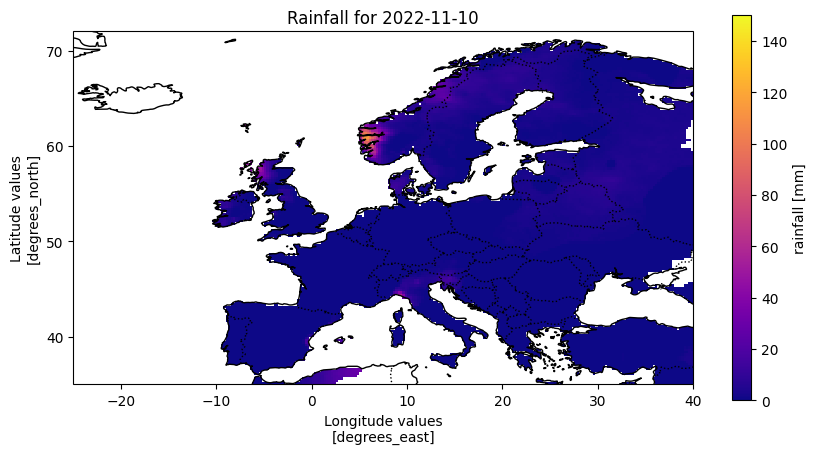

In [ ]:
netcdf_file= xr.open_dataset('rr_2011_2024.nc')
variable_name = 'rr'
desired_date='2022-11-10'
plot_data(
    dataset=netcdf_file,
    desired_date=desired_date,
    variable_name=variable_name,
    title=(f"{getattr(netcdf_file, variable_name).long_name.capitalize()} for {desired_date}"),
    output_path="./output",
    vmin=0,
    vmax=150
)

### Mean temperature

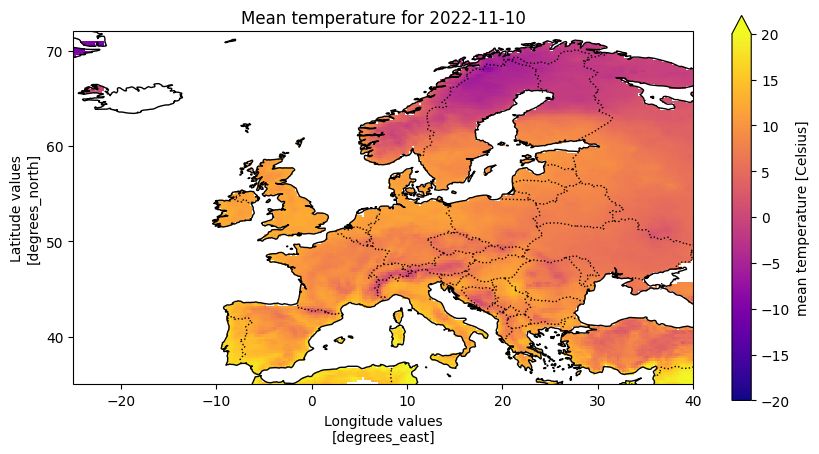

In [ ]:
netcdf_file= xr.open_dataset('ta_2011_2024.nc')
variable_name = 'tg'
desired_date='2022-11-10'
plot_data(
    dataset=netcdf_file,
    desired_date=desired_date,
    variable_name=variable_name,
    title=(f"{getattr(netcdf_file, variable_name).long_name.capitalize()} for {desired_date}"),
    output_path="./output",
    vmin=-20,
    vmax=20
)

### Minimum temperature

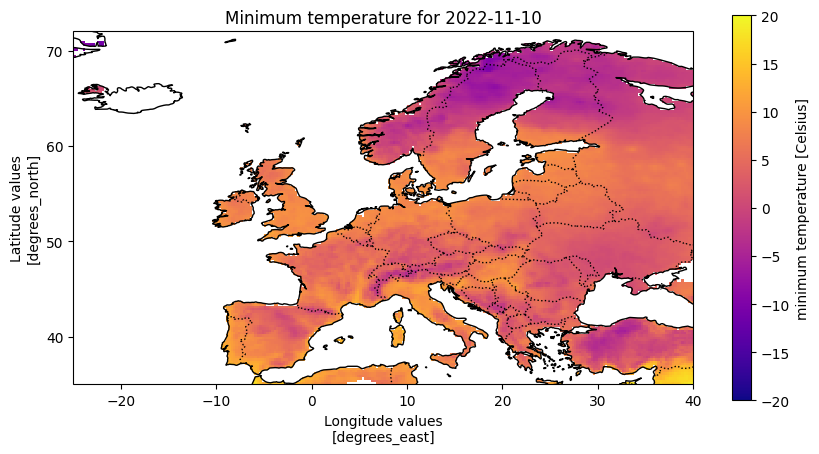

In [ ]:
netcdf_file= xr.open_dataset('tn_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
variable_name = 'tn'
desired_date='2022-11-10'
plot_data(
    dataset=netcdf_file,
    desired_date=desired_date,
    variable_name=variable_name,
    title=(f"{getattr(netcdf_file, variable_name).long_name.capitalize()} for {desired_date}"),
    output_path="./output",
    vmin=-20,
    vmax=20
)

### Maximum temperature

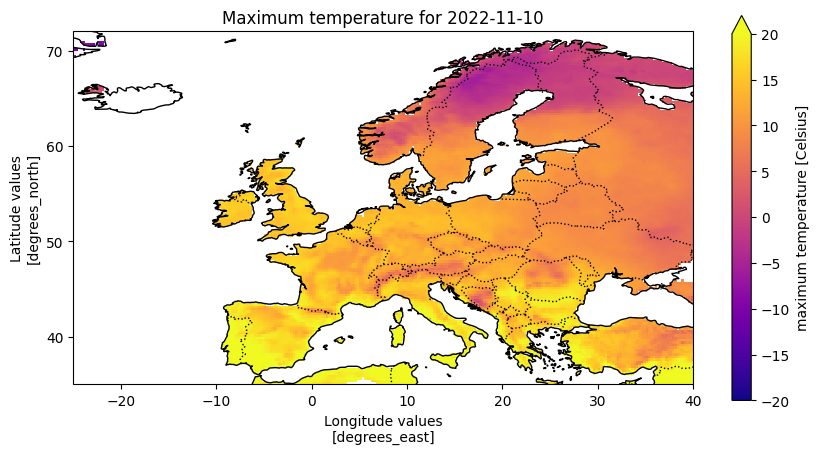

In [ ]:
netcdf_file= xr.open_dataset('tx_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
variable_name = 'tx'
desired_date='2022-11-10'
plot_data(
    dataset=netcdf_file,
    desired_date=desired_date,
    variable_name=variable_name,
    title=(f"{getattr(netcdf_file, variable_name).long_name.capitalize()} for {desired_date}"),
    output_path="./output",
    vmin=-20,
    vmax=20
)

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 55.1 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import cartopy.feature as cfeature

# Interactive
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

In [ ]:
netcdf_file= xr.open_dataset('pm25_2021-01.nc')
print(netcdf_file)

<xarray.Dataset> Size: 875MB
Dimensions:  (time: 744, lon: 700, lat: 420)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2021-01-01 ... 2021-01-31T23:00:00
  * lon      (lon) float64 6kB -24.95 -24.85 -24.75 -24.65 ... 44.75 44.85 44.95
  * lat      (lat) float64 3kB 30.05 30.15 30.25 30.35 ... 71.75 71.85 71.95
Data variables:
    pm2p5    (time, lat, lon) float32 875MB ...
Attributes:
    Conventions:  CF-1.7
    Title:        CAMS European air quality validated reanalysis
    Provider:     COPERNICUS European air quality service
    Production:   COPERNICUS Atmosphere Monitoring Service


Shape of pm2p5_data: (24, 420, 650)


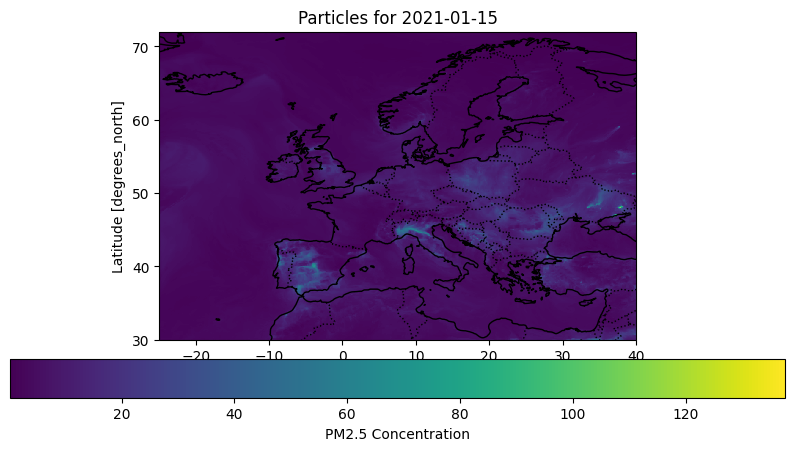

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Select the data for the desired date
desired_date = '2021-01-15'
data_for_desired_date = netcdf_file.sel(time=desired_date)

# Filter the dataset to specific longitude and latitude range
filtered_data = data_for_desired_date.where(
    (data_for_desired_date.lon >= -30) & (data_for_desired_date.lon <= 40) &
    (data_for_desired_date.lat >= 30) & (data_for_desired_date.lat <= 72),
    drop=True
)

# Extract variable for plotting (ensure it's 2D)
pm2p5_data = filtered_data['pm2p5']

# Check the shape of pm2p5_data
print(f"Shape of pm2p5_data: {pm2p5_data.shape}")

# Set up the map
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set ticks and labels
ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
ax.set_yticks(range(30, 80, 10), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude [degrees_east]')
ax.set_ylabel('Latitude [degrees_north]')

# Prepare data for pcolormesh
lon, lat = np.meshgrid(filtered_data.lon, filtered_data.lat)
pm2p5_2d = pm2p5_data.values  # Extract values as a 2D array

# Ensure the data is 2D (time should already be collapsed)
if len(pm2p5_2d.shape) == 3:
    pm2p5_2d = pm2p5_2d[0]  # Select the first time index if still 3D

# Plot the data using pcolormesh
pm2p5_plot = ax.pcolormesh(
    lon,
    lat,
    pm2p5_2d,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    shading='auto'
)

# Add a colorbar
cbar = plt.colorbar(pm2p5_plot, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('PM2.5 Concentration')

# Set the title
plt.title(f"Particles for {desired_date}")
plt.show()


### Generate GIF

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import PIL
import os

def plot_data(dataset, desired_date, variable_name, title, output_path, vmin=None, vmax=None):
    """
    Plots the data for a specific date and saves the plot as an image.

    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data with time, latitude, and longitude dimensions.
    - desired_date: str
        The date to filter and plot data for (format: 'YYYY-MM-DD').
    - variable_name: str
        The name of the variable to plot (e.g., 'tg').
    - title: str
        The title of the plot.
    - output_path: str
        The file path where the plot will be saved.
    - vmin, vmax: float, optional
        Minimum and maximum values for the colormap.
    """
    # Select the data for the desired date
    data_for_desired_date = dataset.sel(time=desired_date)

    # Filter the dataset to include only data between -30 and 40 degrees longitude
    filtered_data = data_for_desired_date.where(
        (data_for_desired_date.longitude >= -30) & (data_for_desired_date.longitude <= 40),
        drop=True
    )

    # Plot the data
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Set ticks and labels
    ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(range(20, 80, 10), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude [degrees_east]')
    ax.set_ylabel('Latitude [degrees_north]')

    # Plot the selected variable from the filtered data
    filtered_data[variable_name].plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="plasma",
        vmin=vmin,
        vmax=vmax
    )

    # Set the title
    plt.title(title)

    # Save the figure
    plt.savefig(output_path)
    plt.close()

def create_gif_from_dataset(dataset, variable_name, output_folder, gif_name, start_day, end_day, vmin, vmax):
    """
    Creates a GIF from the dataset by plotting each day's data.

    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data.
    - variable_name: str
        The name of the variable to plot.
    - output_folder: str
        The folder where the frames and GIF will be saved.
    - gif_name: str
        The name of the output GIF.
    - start_day, end_day: int
        The range of days to include in the GIF.
    """
    os.makedirs(output_folder, exist_ok=True)
    time_values = dataset.time.values[start_day - 1:end_day]

    # Generate frames
    image_frames = []
    for i, date in enumerate(time_values, start=start_day):
        date_str = str(date)[:10]  # Extract the date string
        output_path = f"{output_folder}/{i}.jpg"

        # Plot data for the specific day
        plot_data(
            dataset,
            desired_date=date,
            variable_name=variable_name,
            title=f"{variable_name.capitalize()} for {date_str}",
            output_path=output_path,
            vmin=vmin,
            vmax=vmax
        )

        # Add frame to GIF
        new_frame = PIL.Image.open(output_path)
        image_frames.append(new_frame)

    # Save as GIF
    gif_path = f"{output_folder}/{gif_name}.gif"
    image_frames[0].save(
        gif_path,
        format="GIF",
        append_images=image_frames[1:],
        save_all=True,
        duration=100,
        loop=0,
    )

    print(f"GIF saved at {gif_path}")

In [ ]:
# Parameters
dataset = netcdf_file
output_folder = "./output"
variable_name = "rr"
gif_name = f"{variable_name}_timelapse"
start_day = 1
end_day = 20
vmin=0
vmax=35

# Generate GIF
create_gif_from_dataset(dataset, variable_name, output_folder, gif_name, start_day, end_day, vmin, vmax)


GIF saved at ./output/rr_timelapse.gif


In [ ]:
import shutil

shutil.rmtree('./output')

# Create time series

In [ ]:
import xarray as xr
import datetime as dt

ds = xr.open_dataset('pp_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')

time_target = dt.datetime(2009, 6, 29)
# Coordinates of Budapest
lat_target = 47.25
lon_target = 18.95

timeslice = ds.sel(time=time_target, method='nearest')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')

df_hu_1995 = lat_lon_slice.to_dataframe()
print(df_hu_1995)

            latitude  longitude           pp
time                                        
2011-01-01    47.375     18.875  1020.000000
2011-01-02    47.375     18.875  1018.200012
2011-01-03    47.375     18.875  1022.500000
2011-01-04    47.375     18.875  1025.800049
2011-01-05    47.375     18.875  1025.200073
...              ...        ...          ...
2024-06-26    47.375     18.875  1012.700012
2024-06-27    47.375     18.875  1010.799988
2024-06-28    47.375     18.875  1014.500000
2024-06-29    47.375     18.875  1016.100037
2024-06-30    47.375     18.875  1011.000000

[4930 rows x 3 columns]


### Humidity

In [ ]:
# 1995-2010
import xarray as xr
import datetime as dt

ds = xr.open_dataset('hu_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')

# Coordinates of Budapest
lat_target = 47.3
lon_target = 19.0

lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')

output_path = "df_hu_1995_2010.csv"
df_hu_1995.to_csv(output_path)

df_hu_1995 = lat_lon_slice.to_dataframe()
print(df_hu_1995)

                   hu  latitude  longitude
time                                      
1995-01-01  84.500000    47.375     19.125
1995-01-02  61.700001    47.375     19.125
1995-01-03  73.900002    47.375     19.125
1995-01-04  69.000000    47.375     19.125
1995-01-05  69.300003    47.375     19.125
...               ...       ...        ...
2010-12-27  79.099998    47.375     19.125
2010-12-28  87.599998    47.375     19.125
2010-12-29  88.599998    47.375     19.125
2010-12-30  88.500000    47.375     19.125
2010-12-31        NaN    47.375     19.125

[5844 rows x 3 columns]


In [ ]:
# 2011-2024
import xarray as xr
import datetime as dt

ds = xr.open_dataset('hu_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')

# Coordinates of Budapest
lat_target = 47.3
lon_target = 19.0

lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')

df_hu_2011 = lat_lon_slice.to_dataframe()

output_path = "df_hu_2011_2024.csv"
df_hu_2011.to_csv(output_path)

print(df_hu_2011)

                   hu  latitude  longitude
time                                      
2011-01-01        NaN    47.375     19.125
2011-01-02  87.599998    47.375     19.125
2011-01-03  91.300003    47.375     19.125
2011-01-04        NaN    47.375     19.125
2011-01-05  82.800003    47.375     19.125
...               ...       ...        ...
2024-06-26  65.700005    47.375     19.125
2024-06-27  73.300003    47.375     19.125
2024-06-28  70.900002    47.375     19.125
2024-06-29  62.299999    47.375     19.125
2024-06-30  59.900002    47.375     19.125

[4930 rows x 3 columns]


### Pressure

In [ ]:
# 1995-2010
import xarray as xr
import datetime as dt

# Coordinates of Budapest
lat_target = 47.3
lon_target = 19.0

ds = xr.open_dataset('pp_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_pp_1995 = lat_lon_slice.to_dataframe()
output_path = "df_pp_1995_2010.csv"
df_pp_1995.to_csv(output_path)

ds = xr.open_dataset('pp_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_pp_2011 = lat_lon_slice.to_dataframe()
output_path = "df_pp_2011_2024.csv"
df_pp_2011.to_csv(output_path)


print(df_pp_1995)
print(df_pp_2011)

            latitude  longitude           pp
time                                        
1995-01-01    47.375     19.125   998.799988
1995-01-02    47.375     19.125  1005.100037
1995-01-03    47.375     19.125  1018.299988
1995-01-04    47.375     19.125  1025.700073
1995-01-05    47.375     19.125  1028.700073
...              ...        ...          ...
2010-12-27    47.375     19.125  1024.200073
2010-12-28    47.375     19.125  1023.900024
2010-12-29    47.375     19.125  1028.000000
2010-12-30    47.375     19.125  1028.700073
2010-12-31    47.375     19.125  1026.300049

[5844 rows x 3 columns]
            latitude  longitude           pp
time                                        
2011-01-01    47.375     19.125  1020.000000
2011-01-02    47.375     19.125  1018.100037
2011-01-03    47.375     19.125  1022.600037
2011-01-04    47.375     19.125  1025.900024
2011-01-05    47.375     19.125  1025.400024
...              ...        ...          ...
2024-06-26    47.375     19.12

### Rainfall

In [ ]:
# 1995-2010
import xarray as xr
import datetime as dt

# Coordinates of Budapest
lat_target = 47.3
lon_target = 19.0

ds = xr.open_dataset('rr_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_rr_1995 = lat_lon_slice.to_dataframe()
output_path = "df_rr_1995_2010.csv"
df_rr_1995.to_csv(output_path)

ds = xr.open_dataset('rr_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_rr_2011 = lat_lon_slice.to_dataframe()
output_path = "df_rr_2011_2024.csv"
df_rr_2011.to_csv(output_path)


print(df_rr_1995)
print(df_rr_2011)

            latitude  longitude   rr
time                                
1995-01-01    47.375     19.125  0.0
1995-01-02    47.375     19.125  0.0
1995-01-03    47.375     19.125  0.0
1995-01-04    47.375     19.125  0.0
1995-01-05    47.375     19.125  0.0
...              ...        ...  ...
2010-12-27    47.375     19.125  0.0
2010-12-28    47.375     19.125  0.0
2010-12-29    47.375     19.125  0.0
2010-12-30    47.375     19.125  0.0
2010-12-31    47.375     19.125  0.0

[5844 rows x 3 columns]
            latitude  longitude   rr
time                                
2011-01-01    47.375     19.125  0.0
2011-01-02    47.375     19.125  0.0
2011-01-03    47.375     19.125  0.0
2011-01-04    47.375     19.125  0.0
2011-01-05    47.375     19.125  0.0
...              ...        ...  ...
2024-06-26    47.375     19.125  0.0
2024-06-27    47.375     19.125  7.5
2024-06-28    47.375     19.125  0.0
2024-06-29    47.375     19.125  0.0
2024-06-30    47.375     19.125  0.0

[4930 rows x

### Temperature

In [ ]:
# 1995-2010
import xarray as xr
import datetime as dt

# Coordinates of Budapest
lat_target = 47.3
lon_target = 19.0

ds = xr.open_dataset('tg_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_tg_1995 = lat_lon_slice.to_dataframe()
output_path = "df_tg_1995_2010.csv"
df_tg_1995.to_csv(output_path)

ds = xr.open_dataset('tg_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_tg_2011 = lat_lon_slice.to_dataframe()
output_path = "df_tg_2011_2024.csv"
df_tg_2011.to_csv(output_path)


print(df_tg_1995)
print(df_tg_2011)

            latitude  longitude    tg
time                                 
1995-01-01    47.375     19.125  2.82
1995-01-02    47.375     19.125  2.36
1995-01-03    47.375     19.125  0.51
1995-01-04    47.375     19.125 -0.96
1995-01-05    47.375     19.125 -0.05
...              ...        ...   ...
2010-12-27    47.375     19.125 -5.58
2010-12-28    47.375     19.125 -7.29
2010-12-29    47.375     19.125 -8.78
2010-12-30    47.375     19.125 -7.94
2010-12-31    47.375     19.125 -6.53

[5844 rows x 3 columns]
            latitude  longitude         tg
time                                      
2011-01-01    47.375     19.125  -2.850000
2011-01-02    47.375     19.125  -1.320000
2011-01-03    47.375     19.125  -4.320000
2011-01-04    47.375     19.125  -4.070000
2011-01-05    47.375     19.125  -4.470000
...              ...        ...        ...
2024-06-26    47.375     19.125  24.709999
2024-06-27    47.375     19.125  23.100000
2024-06-28    47.375     19.125  24.699999
2024-06-

### Particles

In [ ]:
# 1995-2010
import xarray as xr
import datetime as dt

# Coordinates of Budapest
lat_target = 47.3
lon_target = 19.0

ds = xr.open_dataset('tg_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_tg_1995 = lat_lon_slice.to_dataframe()
output_path = "df_tg_1995_2010.csv"
df_tg_1995.to_csv(output_path)

ds = xr.open_dataset('tg_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')
lat_lon_slice = ds.sel(latitude=lat_target, longitude=lon_target, method='nearest')
df_tg_2011 = lat_lon_slice.to_dataframe()
output_path = "df_tg_2011_2024.csv"
df_tg_2011.to_csv(output_path)


print(df_tg_1995)
print(df_tg_2011)

In [ ]:
import xarray as xr

ds = xr.open_dataset('pm25_2021-01.nc')

latitudes = ds.lat.values
longitudes = ds.lon.values

coordinate_list_pm= [(lat, lon) for lat in latitudes for lon in longitudes]

Total coordinates: 294000
Sample coordinates: [(30.05, -24.95), (30.05, -24.849999999999998), (30.05, -24.75), (30.05, -24.65), (30.05, -24.55), (30.05, -24.45), (30.05, -24.349999999999998), (30.05, -24.25), (30.05, -24.15), (30.05, -24.05)]


In [ ]:
import xarray as xr

ds = xr.open_dataset('pp_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc')

latitudes = ds.latitude.values
longitudes = ds.longitude.values

coordinate_list_pp= [(lat, lon) for lat in latitudes for lon in longitudes]

In [ ]:
import xarray as xr

# Load datasets
ds_pm = xr.open_dataset('pm25_2021-01.nc')
ds_pp = xr.open_dataset('rr_ens_mean_0.1deg_reg_2011-2024_v30.0e.nc')

latitudes_pm, longitudes_pm = ds_pm.lat.values, ds_pm.lon.values
latitudes_pp, longitudes_pp = ds_pp.latitude.values, ds_pp.longitude.values

coordinates_pm = [(lat, lon) for lat in latitudes_pm for lon in longitudes_pm]
coordinates_pp = [(lat, lon) for lat in latitudes_pp for lon in longitudes_pp]

precision = 2
coordinates_pm = [(round(lat, precision), round(lon, precision)) for lat, lon in coordinates_pm]
coordinates_pp = [(round(lat, precision), round(lon, precision)) for lat, lon in coordinates_pp]

threshold = 0.5
filtered_pm = [(lat, lon) for lat, lon in coordinates_pm if abs(lat - 47) <= threshold and abs(lon - 19) <= threshold]
filtered_pp = [(lat, lon) for lat, lon in coordinates_pp if abs(lat - 47) <= threshold and abs(lon - 19) <= threshold]

common_coordinates = set(filtered_pm).intersection(filtered_pp)

print(f"Number of common coordinates: {len(common_coordinates)}")
print("Common coordinates:", common_coordinates)


Number of common coordinates: 100
Common coordinates: {(47.45, 19.35), (46.85, 19.15), (47.45, 19.25), (46.55, 19.15), (47.05, 18.55), (46.85, 18.55), (47.15, 19.25), (46.65, 19.25), (47.35, 18.95), (46.95, 19.45), (46.85, 18.95), (46.55, 18.95), (47.45, 18.65), (47.15, 18.55), (47.25, 19.25), (46.65, 18.55), (47.15, 18.65), (46.95, 18.75), (46.75, 19.25), (46.65, 18.65), (47.05, 19.35), (46.85, 19.35), (47.25, 18.55), (47.35, 19.25), (46.75, 18.55), (47.25, 18.65), (46.85, 19.25), (46.75, 18.65), (46.55, 19.25), (47.45, 19.45), (47.15, 19.35), (47.05, 18.75), (46.65, 19.35), (47.35, 18.55), (46.95, 19.05), (46.65, 19.45), (47.35, 18.65), (47.05, 18.65), (46.85, 18.65), (46.55, 18.55), (47.45, 18.75), (47.25, 19.35), (47.15, 18.75), (46.95, 18.85), (46.75, 19.35), (47.25, 19.45), (46.65, 18.75), (46.95, 18.95), (46.75, 19.45), (47.35, 19.35), (47.25, 18.75), (47.35, 19.45), (46.75, 18.75), (47.05, 19.45), (46.85, 19.45), (46.55, 19.35), (47.45, 19.05), (47.05, 18.85), (47.15, 19.05), (

In [ ]:
print("PM Dataset Latitudes:", ds_pm.lat.values)
print("PM Dataset Longitudes:", ds_pm.lon.values)
print("PP Dataset Latitudes:", ds_pp.latitude.values)
print("PP Dataset Longitudes:", ds_pp.longitude.values)


PM Dataset Latitudes: [30.05 30.15 30.25 30.35 30.45 30.55 30.65 30.75 30.85 30.95 31.05 31.15
 31.25 31.35 31.45 31.55 31.65 31.75 31.85 31.95 32.05 32.15 32.25 32.35
 32.45 32.55 32.65 32.75 32.85 32.95 33.05 33.15 33.25 33.35 33.45 33.55
 33.65 33.75 33.85 33.95 34.05 34.15 34.25 34.35 34.45 34.55 34.65 34.75
 34.85 34.95 35.05 35.15 35.25 35.35 35.45 35.55 35.65 35.75 35.85 35.95
 36.05 36.15 36.25 36.35 36.45 36.55 36.65 36.75 36.85 36.95 37.05 37.15
 37.25 37.35 37.45 37.55 37.65 37.75 37.85 37.95 38.05 38.15 38.25 38.35
 38.45 38.55 38.65 38.75 38.85 38.95 39.05 39.15 39.25 39.35 39.45 39.55
 39.65 39.75 39.85 39.95 40.05 40.15 40.25 40.35 40.45 40.55 40.65 40.75
 40.85 40.95 41.05 41.15 41.25 41.35 41.45 41.55 41.65 41.75 41.85 41.95
 42.05 42.15 42.25 42.35 42.45 42.55 42.65 42.75 42.85 42.95 43.05 43.15
 43.25 43.35 43.45 43.55 43.65 43.75 43.85 43.95 44.05 44.15 44.25 44.35
 44.45 44.55 44.65 44.75 44.85 44.95 45.05 45.15 45.25 45.35 45.45 45.55
 45.65 45.75 45.85 45.95 46.0

In [ ]:
ds_pm.info()

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/zmq/eventloop/zmqstream.py", line 557, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 118, in _handle_event
    event_f()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 381, in _flush
    self.session.send(self.pub_thread, 'stream', content=content,
  File "/usr/local/lib/python3.10/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
  File "/usr/local/lib/python3.10/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
  File "/usr/local/lib/python3.10/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
  File "/usr/local/lib/python3.10/dist-packages/zmq/utils/json

In [ ]:
df_hu_1995.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5844 entries, 1995-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hu         5657 non-null   float32
 1   latitude   5844 non-null   float64
 2   longitude  5844 non-null   float64
dtypes: float32(1), float64(2)
memory usage: 288.8 KB


In [ ]:
df_hu_1995 = df_hu_1995.dropna()
df_hu_1995.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5657 entries, 1995-01-01 to 2010-12-30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hu         5657 non-null   float32
 1   latitude   5657 non-null   float64
 2   longitude  5657 non-null   float64
dtypes: float32(1), float64(2)
memory usage: 154.7 KB


## Generalizing the conversion

In [ ]:
import xarray as xr
import datetime as dt
import os

folder_path = "/content"

# Target coordinate and time
# time_target = dt.datetime(2009, 6, 29)
lat_target = 47.29
lon_target = 19.03

# Dictionary to store DataFrames
dataframes = {}

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".nc"):
        # Parse the file name
        parts = file_name.split("_")
        prefix = parts[0]
        year_range = parts[1].split(".")[0]
        df_name = f"df_{prefix}_{year_range}"

        # Open the NetCDF file
        file_path = os.path.join(folder_path, file_name)
        ds = xr.open_dataset(file_path)

        # Extract the slice for the target coordinate and time
        lat_lon_slice = ds.sel(
            latitude=lat_target, longitude=lon_target, method="nearest"
        )

        # Convert to a DataFrame and store in the dictionary
        dataframes[df_name] = lat_lon_slice.to_dataframe()

# Print the dynamically created DataFrames
for df_name, df in dataframes.items():
    print(f"DataFrame Name: {df_name}")
    print(df.head())


DataFrame Name: df_tx_1995
            latitude  longitude    tx
time                                 
1995-01-01    47.375     19.125  5.24
1995-01-02    47.375     19.125  4.99
1995-01-03    47.375     19.125  2.30
1995-01-04    47.375     19.125  0.41
1995-01-05    47.375     19.125  2.57
DataFrame Name: df_tx_2011
            latitude  longitude    tx
time                                 
2011-01-01    47.375     19.125 -1.27
2011-01-02    47.375     19.125  2.53
2011-01-03    47.375     19.125  0.08
2011-01-04    47.375     19.125 -2.98
2011-01-05    47.375     19.125 -3.25


In [ ]:
print(dataframes.keys())

dict_keys(['df_tx_1995', 'df_tx_2011'])


In [ ]:
dataframes['df_tx_1995'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5844 entries, 1995-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   5844 non-null   float64
 1   longitude  5844 non-null   float64
 2   tx         5844 non-null   float32
dtypes: float32(1), float64(2)
memory usage: 159.8 KB


In [ ]:
import pandas as pd
# ignore index False, I want to keep the time index
df_tx_1995_2011 = pd.concat([dataframes['df_tx_1995'], dataframes['df_tx_2011']], ignore_index=False)
print(df_tx_1995_2011)

            latitude  longitude         tx
time                                      
1995-01-01    47.375     19.125   5.240000
1995-01-02    47.375     19.125   4.990000
1995-01-03    47.375     19.125   2.300000
1995-01-04    47.375     19.125   0.410000
1995-01-05    47.375     19.125   2.570000
...              ...        ...        ...
2024-06-26    47.375     19.125  29.990000
2024-06-27    47.375     19.125  28.430000
2024-06-28    47.375     19.125  31.049999
2024-06-29    47.375     19.125  33.389999
2024-06-30    47.375     19.125  34.439999

[10774 rows x 3 columns]


## Dataframe

In [ ]:
import pandas as pd
import os

### Climate

In [ ]:
folder_path = '/content'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

for csv_file in csv_files:
    # Clean the filename to use as a variable name (remove extension and spaces)
    df_name = os.path.splitext(csv_file)[0].replace(" ", "_")

    # Create the DataFrame and assign it to a variable dynamically
    globals()[df_name] = pd.read_csv(os.path.join(folder_path, csv_file))

    print(f"Loaded {csv_file} into DataFrame: {df_name}")


Loaded df_rr_2011_2024.csv into DataFrame: df_rr_2011_2024
Loaded df_tg_1995_2010.csv into DataFrame: df_tg_1995_2010
Loaded df_pp_2011_2024.csv into DataFrame: df_pp_2011_2024
Loaded df_hu_1995_2010.csv into DataFrame: df_hu_1995_2010
Loaded df_rr_1995_2010.csv into DataFrame: df_rr_1995_2010
Loaded df_pp_1995_2010.csv into DataFrame: df_pp_1995_2010
Loaded df_tg_2011_2024.csv into DataFrame: df_tg_2011_2024
Loaded df_hu_2011_2024.csv into DataFrame: df_hu_2011_2024


In [ ]:
df_hu_1995_2010.head()

,time,hu,latitude,longitude
0,1995-01-01,84.5,47.375,19.125
1,1995-01-02,61.7,47.375,19.125
2,1995-01-03,73.9,47.375,19.125
3,1995-01-04,69.0,47.375,19.125
4,1995-01-05,69.3,47.375,19.125


In [ ]:
import pandas as pd

# List of DataFrames and their relevant columns
dataframes_info = {
    "tg": df_tg_1995_2010,
    "hu": df_hu_1995_2010,
    "rr": df_rr_1995_2010,
    "pp": df_pp_1995_2010
}

# Initialize an empty list to store processed DataFrames
climate_1995_2010 = []

# Select 'time' and the weather parameter column, rename appropriately
for param, df in dataframes_info.items():
    df_cleaned = df[['time', param]].copy()  # Select time and the parameter column
    climate_1995_2010.append(df_cleaned)

# Merge all DataFrames on 'time' column
merged_df_1995_2010 = climate_1995_2010[0]
for df in climate_1995_2010[1:]:
    merged_df_1995_2010 = pd.merge(merged_df_1995_2010, df, on='time', how='outer')

# Display the final merged DataFrame
print(merged_df_1995_2010.head())


         time    tg    hu   rr          pp
0  1995-01-01  2.82  84.5  0.0   998.80000
1  1995-01-02  2.36  61.7  0.0  1005.10004
2  1995-01-03  0.51  73.9  0.0  1018.30000
3  1995-01-04 -0.96  69.0  0.0  1025.70010
4  1995-01-05 -0.05  69.3  0.0  1028.70010


In [ ]:
dataframes_info = {
    "tg": df_tg_2011_2024,
    "hu": df_hu_2011_2024,
    "rr": df_rr_2011_2024,
    "pp": df_pp_2011_2024
}

# Initialize an empty list to store processed DataFrames
climate_2011_2024 = []

# Select 'time' and the weather parameter column, rename appropriately
for param, df in dataframes_info.items():
    df_cleaned = df[['time', param]].copy()  # Select time and the parameter column
    climate_2011_2024.append(df_cleaned)

# Merge all DataFrames on 'time' column
merged_df_2011_2024 = climate_2011_2024[0]
for df in climate_2011_2024[1:]:
    merged_df_2011_2024 = pd.merge(merged_df_2011_2024, df, on='time', how='outer')

# Display the final merged DataFrame
print(merged_df_2011_2024.head())


         time    tg    hu   rr          pp
0  2011-01-01 -2.85   NaN  0.0  1020.00000
1  2011-01-02 -1.32  87.6  0.0  1018.10004
2  2011-01-03 -4.32  91.3  0.0  1022.60004
3  2011-01-04 -4.07   NaN  0.0  1025.90000
4  2011-01-05 -4.47  82.8  0.0  1025.40000


In [ ]:
climate_df = pd.concat([merged_df_1995_2010, merged_df_2011_2024], axis=0, ignore_index=True)

print(climate_df.head())
print(climate_df.tail())


         time    tg    hu   rr          pp
0  1995-01-01  2.82  84.5  0.0   998.80000
1  1995-01-02  2.36  61.7  0.0  1005.10004
2  1995-01-03  0.51  73.9  0.0  1018.30000
3  1995-01-04 -0.96  69.0  0.0  1025.70010
4  1995-01-05 -0.05  69.3  0.0  1028.70010
             time         tg         hu   rr          pp
10769  2024-06-26  24.710000  65.700005  0.0  1013.00000
10770  2024-06-27  23.100000  73.300000  7.5  1011.10004
10771  2024-06-28  24.699999  70.900000  0.0  1014.70000
10772  2024-06-29  27.150000  62.300000  0.0  1016.20000
10773  2024-06-30  28.480000  59.900000  0.0  1011.30000


In [ ]:
climate_df.to_csv('climate_df.csv', index=False)
print("The DataFrame has been saved")


The DataFrame has been saved
